# Lineárna regresia
V predošlých kapitolách sme najskôr predstavili druhy učenia s učiteľom a model pre klasifikáciu. <br>
V tejto kapitole predstavíme jeden z najzákladnejších druhov regresie a to **lineárnu regresiu**. <br>

Lineárna regresia:
* je to spôsob predikcie
* modeluje vzťah položením priamky 
* predikuje na základe dvoch a viacerých premenných(vzťahov)
* budeme využívať všeobecný prepis pre priamku: y = ax + b
    * a je váha vzťahu medzi premennými
    * b je odchýlka(bias)

Obrázok: LinRegresia.png

Využijeme dataset o reklamách. <br>
* ako vždy si musíme najskôr naimportovať dataset, teraz budeme používať knižnicu Pandas.

In [1]:
import pandas as pd
url = "https://raw.githubusercontent.com/justmarkham/scikit-learn-videos/master/data/Advertising.csv"
data = pd.read_csv(url)
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


#### O čom je dataset? <br>
* zaznamenáva priemerné ceny za reklamy na jeden predaný produkt

In [2]:
data.loc[:0]

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1


**Všeobecný príklad z prvého riadku:** <br>
V prvom riadku máme 22.1 produktov, ktoré sme predali po tom, čo sme investovali 230.1 dolárov v televízii, 37.8 dolárov v rádiu a 69.2 dolárov v novinách **v priemere za reklamu na daný produkt**

In [3]:
data.loc[1:1]

,Unnamed: 0,TV,Radio,Newspaper,Sales
1,2,44.5,39.3,45.1,10.4


**Konkrétny príklad z druhého riadku** [44.5, 39.3, 45.1, 10.4]: <br>
Chceme predať naše doma vyrobené mydlo. Nevieme avšak do akých reklám investovať a teda spravíme pokus. Do televízie investujeme 44.5€ v priemere za jednu reklamu,
do rádia investujeme o trochu menej a to 39.3€ v priemere za reklamu a novinám budeme veriť najviac a tam dáme 45.1€. Po tejto našej celkovej investícii sme predali 10.4 mydla.

Pomocou metódy **describe**, sa vieme pozrieť na štatistiky nášho datasetu, vidíme napríklad, všetky vlastnosti majú 200 údajov a teda nám nechýbajú nejaké. 
Ďalej aký je *priemer, smerodajná odchýlka, minimálna hodnota, maximálna hodnota a 50% percentil* 

In [4]:
data.describe(percentiles=[])

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
max,200.000000,296.400000,49.600000,114.000000,27.000000


Môžeme si zoradiť dáta a pozrieť sa, ktorý produkt mal najviac predajov a pri akej investícii. 

In [5]:
data.sort_values(by='Sales',ascending=False, inplace=True, )
data

,Unnamed: 0,TV,Radio,Newspaper,Sales
175,176,276.9,48.9,41.8,27.0
183,184,287.6,43.0,71.8,26.2
198,199,283.6,42.0,66.2,25.5
98,99,289.7,42.3,51.2,25.4
147,148,243.2,49.0,44.3,25.4
...,...,...,...,...,...
108,109,13.1,0.4,25.6,5.3
78,79,5.4,29.9,9.4,5.3
8,9,8.6,2.1,1.0,4.8
155,156,4.1,11.6,5.7,3.2


Teraz sa pozrieme sa aké rozmery má náš dataset.

In [6]:
data.shape

(200, 5)

Pripravíme si naše **X** (2D matica vlastností a ich dát) a **y** (vektor s odpoveďami).
* zadefinujeme si stĺpce: médiá a tie vložíme do X.

In [7]:
X = data[['TV', 'Radio', 'Newspaper']]
X.head()

,TV,Radio,Newspaper
175,276.9,48.9,41.8
183,287.6,43.0,71.8
198,283.6,42.0,66.2
98,289.7,42.3,51.2
147,243.2,49.0,44.3


## 1.otázka
3 správne odpovede <br>
**Ako skontrolujeme, že má naše X požadované veľkosti dát?**<br>
   * print(X.info) **SPRAVNE**
   * X.shape  **SPRÁVNE**
   * X.information
   * X.data
   * print(X.shape) **SPRÁVNE**
   * X.data.shape
   * print(X.data.shape)
        
        
Pri správnej odpovedi: Správne odpovede.

In [11]:
X.info

<bound method DataFrame.info of         TV  Radio  Newspaper
175  276.9   48.9       41.8
183  287.6   43.0       71.8
198  283.6   42.0       66.2
98   289.7   42.3       51.2
147  243.2   49.0       44.3
..     ...    ...        ...
108   13.1    0.4       25.6
78     5.4   29.9        9.4
8      8.6    2.1        1.0
155    4.1   11.6        5.7
130    0.7   39.6        8.7

[200 rows x 3 columns]>

* teraz si nadefinujeme y
    * float64 je dátový typ, ktorý reprezentuje desatinné čísla na dĺžke max 64 bitov

In [9]:
y = data.Sales
y.head()

175    27.0
183    26.2
198    25.5
98     25.4
147    25.4
Name: Sales, dtype: float64

* rozdelíme X a y na **trénovacie a testovacie časti**
    * trénovacie a testovacie dáta popíšeme podrobnejšie v nasledujúcej kapitole 8
    * na to nám poslúži model train_test_split o ktorom si povieme v neskoršej kapitole
    * pomer rozdeľovania je 75% pre trénovacie časti a 25% pre testovacie, čo vidíme na výpisoch(máme 200 prvkov)

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(150, 3)
(150,)
(50, 3)
(50,)


* naimportujeme model lineárnej regresie a uložíme ho do premennej 
* model sa naučí na našich **trénovacích dátach**

In [11]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

* v úvode sme popisovali všeobecnú rovnicu pre priamku: y = a * x + b <br>
* my počítame ale s viacerými premennými, takže naša rovnica, po doplnení názvov, je: **y = a * TV + b * Radio + c * Newspaper + d**
* **a**,**b**,**c** sú koeficienty a vypočítame ich pomocou *coef_* 

In [12]:
print(linreg.coef_)

[0.04423405 0.17835003 0.01267121]


* **d** vypočítame pomocou *intercept_*, ide o konštantu, ktorá predstavuje odhadovanú priemernú hodnotu pre y ak všetky x sú 0

In [13]:
print(linreg.intercept_)

3.0513305061473392


* metóda *zip* nám spojí tieto hodnoty 

In [14]:
stlpce = ['TV', 'Radio', 'Newspaper']
list(zip(stlpce, linreg.coef_))

[('TV', 0.04423404829774412),
 ('Radio', 0.17835003149063658),
 ('Newspaper', 0.012671205031136284)]

### Čo znamenajú tieto dáta?
* 0.047 nám hovorí to, že ak by sme investovali do reklám v *televízii* 1000 dolárov, tak by sme dostali o 47 viac predaných produktov (ide o odhad, predikciu)
* pri *rádiu* je to o 18 produktov viac a pri *novinách* najmenej: o 0.3 produktu

* na vizualizáciu dát použijeme *Seaborn* knižnicu
* chceme vizualizovať **jednotlivé média** v porovnaní s ich **predajmi** 
* využívame **regresiu** ako druh modelu.

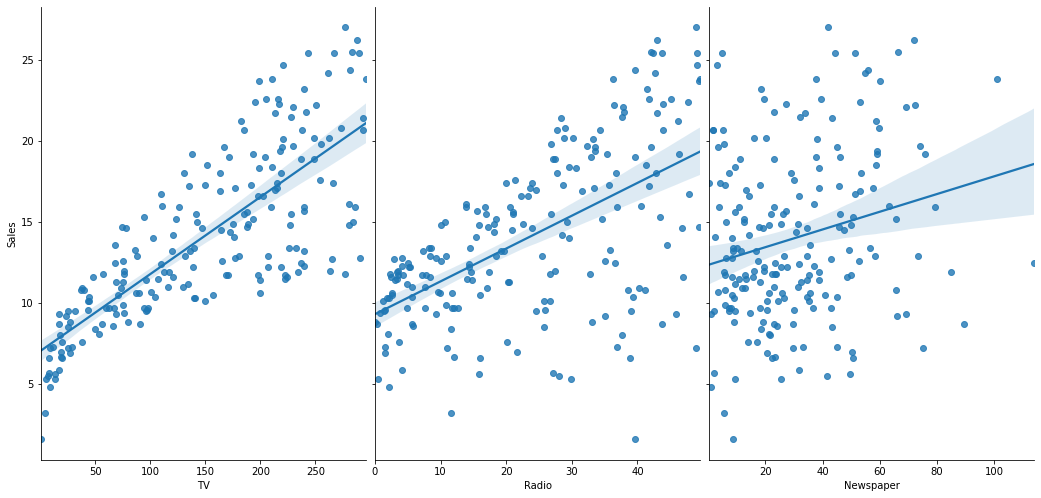

In [15]:
import seaborn as sns
sns.pairplot(data, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', height=7, aspect=0.7, kind='reg')

#### Materiály na dodatočné štúdium
Podrobnejšie popísaná lineárna regresia: <br>
https://www.scribbr.com/statistics/simple-linear-regression/ <br>
https://medium.datadriveninvestor.com/regression-in-machine-learning-296caae933ec